In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'C:\\Users\\Ufuk Altan\\Downloads\\TimeSeriesCourse\\UDEMY_TSA_FINAL\\Data\\airline_passengers.csv'
airline = pd.read_csv(path, index_col ='Month', parse_dates =True)
airline.index.freq = 'MS'
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
airline['SMA6'] = airline['Thousands of Passengers'].rolling(window = 6).mean()

In [4]:
airline['SMA12'] = airline['Thousands of Passengers'].rolling(window = 12).mean()

<AxesSubplot:xlabel='Month'>

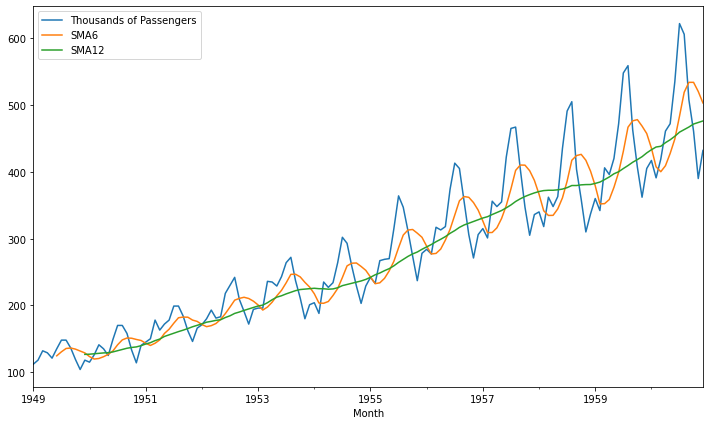

In [5]:
airline.plot(figsize = (12,7))

In [6]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

<AxesSubplot:xlabel='Month'>

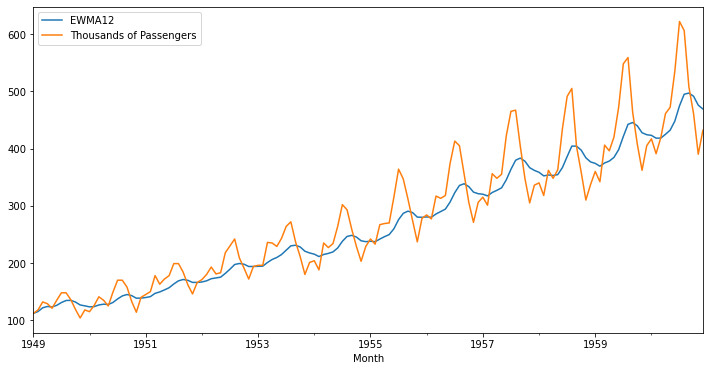

In [8]:
airline[['EWMA12', 'Thousands of Passengers']].plot(figsize = (12,6))

In [ ]:
#ETS

In [10]:
airline = airline.drop(['SMA6', 'SMA12', 'EWMA12'], axis = 1)

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [15]:
result = seasonal_decompose(airline['Thousands of Passengers'], model = 'multiplicative')

<AxesSubplot:xlabel='Month'>

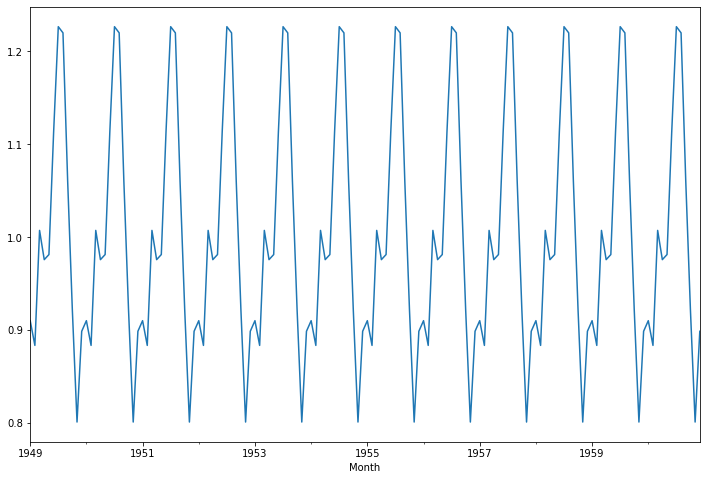

In [17]:
result.seasonal.plot(figsize = (12,8))

<AxesSubplot:xlabel='Month'>

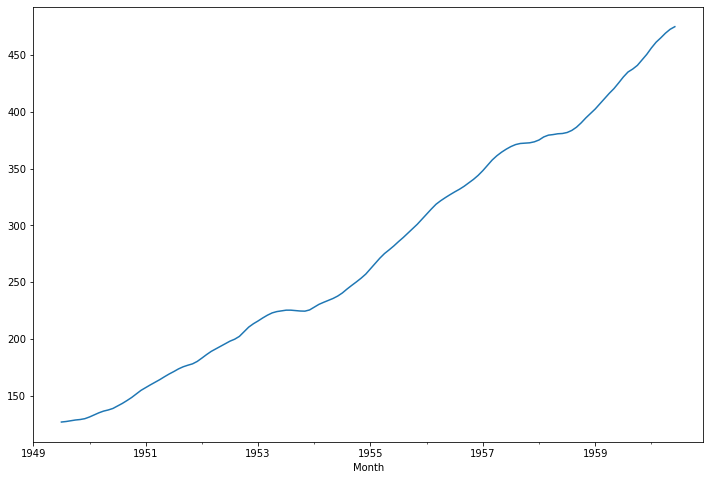

In [18]:
result.trend.plot(figsize = (12,8))

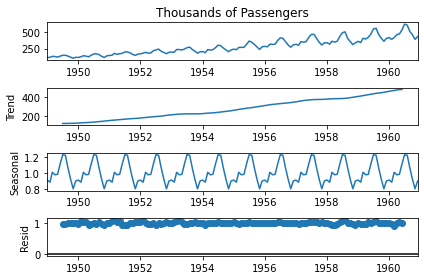

In [19]:
result.plot();